# The Stroop Effect

In this notebook, we perform an statstical test on [data of the Stroop effect](./data/stroopdata.csv) obtained from Udacity.


## Content

Background on Stroop effect
Data Analysis
    Descriptive Statistics
    Exploratory Data Analysis (EDA)

References


Perform the analysis in the space below. Remember to follow [the instructions] and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.




## Background on Stroop effect

The Stroop effect is a psycological phenomenon shown in human cognition to relate concepts (words) to vision (images, colors). In order to understand such relation of concepts and images, psycologists test a participant with a list of words, which displays words in different color of ink. The participant's task is to say the color of the ink of the word shown.   


In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

[[1](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True)]

(1) What is the independent variable? What is the dependent variable?

Independent variables:
* Color
* Label
* Person

Dependent variables:
* Time

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$$H_0: \mu_0 \geq \mu_1$$
$$H_1: \mu_0 < \mu_1$$

where $\mu_0$ is the mean of the time it took people on the sample to read all labels consistent with color

and $\mu_1$ is the mean of the time it took people on the sample to read all labels incongruent with color

## Data Analysis

In this section, we will concentrate of obtaining some statistics of our data and doing some exploration of it.

### Descriptive Statistics



In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [39]:
path = "data/"
file = 'stroopdata.csv'
df = pd.read_csv(path+file)
df.head(5)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [33]:
# Perform the analysis here

--write answer here--

### Exploratory Data Analysis (EDA)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

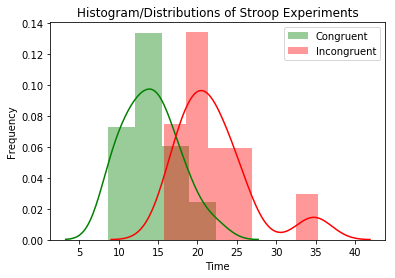

In [34]:
# EDA

sns.distplot(df["Congruent"], bins=4, color='g', label = "Congruent")
sns.distplot(df["Incongruent"], bins=7, color ='r', label = "Incongruent")
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram/Distributions of Stroop Experiments')
plt.legend();

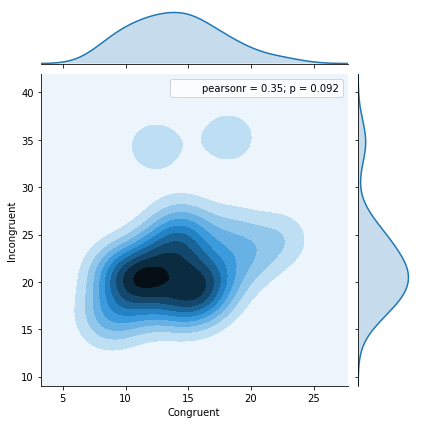

In [35]:
#Kernel density estimation
sns.jointplot(x="Congruent", y="Incongruent", data=df, kind="kde");

--write answer here--

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [36]:
# Perform the statistical test here

--write answer here--

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

## References

[1] Statistics: The Science of Decisions Project Instructions:[https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True)
